
**Your Name: Martina Ryan**

**Your Student ID Number: 20200692**

# E-tivity 1: Exploratory Data Analysis (21 March - 27 March)
    
In this e-tivity you will be introduced to the basic concepts and notation used in data analytics tasks. You will also practice exploratory data analysis (EDA) as a first step in the process of discovering information in a dataset. At the end of the E-tivity you should be able to:

-load a dataset from a CSV file to Pandas dataframe and generate descriptive statistics for its numerical and categorical attributes

-plot the distribution of numerical and categorical attributes in a data set with histograms, boxplots, violinplots, stripplots and swarmplots plot the combined distribution of multiple attributes in a data set with a variety of plotting techniques
utilise EDA for getting an intuitive insight into a dataset


1. Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).

2. Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

3. Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).

4. Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell).

5. Make sure your conclusions are related to the question you have formulated.



# Attribute Information:

Input variables:

**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: .degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [7]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('./bank.csv')

### Quick Data Exploration

In [9]:
# Print first 5 rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [10]:
# Print last 5 rows of the dataframe
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

There are 2000 data rows of both numerical and categorical data.  
The subscribe attribute (last column) is the output variable (desired target) and has binary attributes yes or no on if the client subscribed a term deposit.  

In [69]:
#Check to see what data might be missing
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

### Quick Examination of Numerical Attributes

In [52]:
# Print statistical summary for all numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

Age has a count of 1988 out of 2000 rows, so there are 12 values missing.  Balance appears to be very skewed since the mean is 1413 and the median (50% figure) is 551 and there is also a negative balance with -980 showing for at least one of the entries. 

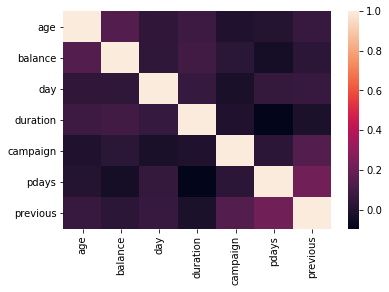

In [50]:
#Examine the correlation matrix of all numerical attributes in the form of a heat map
sns.heatmap(df.corr());

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.139874  0.042411  0.076732 -0.002876  0.009121  0.063805
balance   0.139874  1.000000  0.037078  0.096633  0.025103 -0.033014  0.030292
day       0.042411  0.037078  1.000000  0.058597 -0.019719  0.054188  0.063716
duration  0.076732  0.096633  0.058597  1.000000 -0.005188 -0.095650 -0.015965
campaign -0.002876  0.025103 -0.019719 -0.005188  1.000000  0.030929  0.140995
pdays     0.009121 -0.033014  0.054188 -0.095650  0.030929  1.000000  0.218636
previous  0.063805  0.030292  0.063716 -0.015965  0.140995  0.218636  1.000000

<AxesSubplot:>

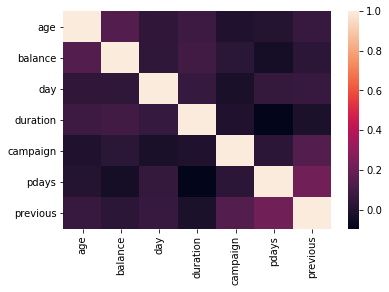

In [51]:
#bivariate plot
display(df.corr()) 
sns.heatmap(df.corr())

There isn't signification correlation in this heatmap as they are mostly close to 0, the correlation observed in this heatmap is between the number of days that passed by after the client was last contacted from a previous campaign (pdays) and the number of contacts performed before this campaign and for this client (previous). Pdays and Previous have a positive correlation of 0.218636.

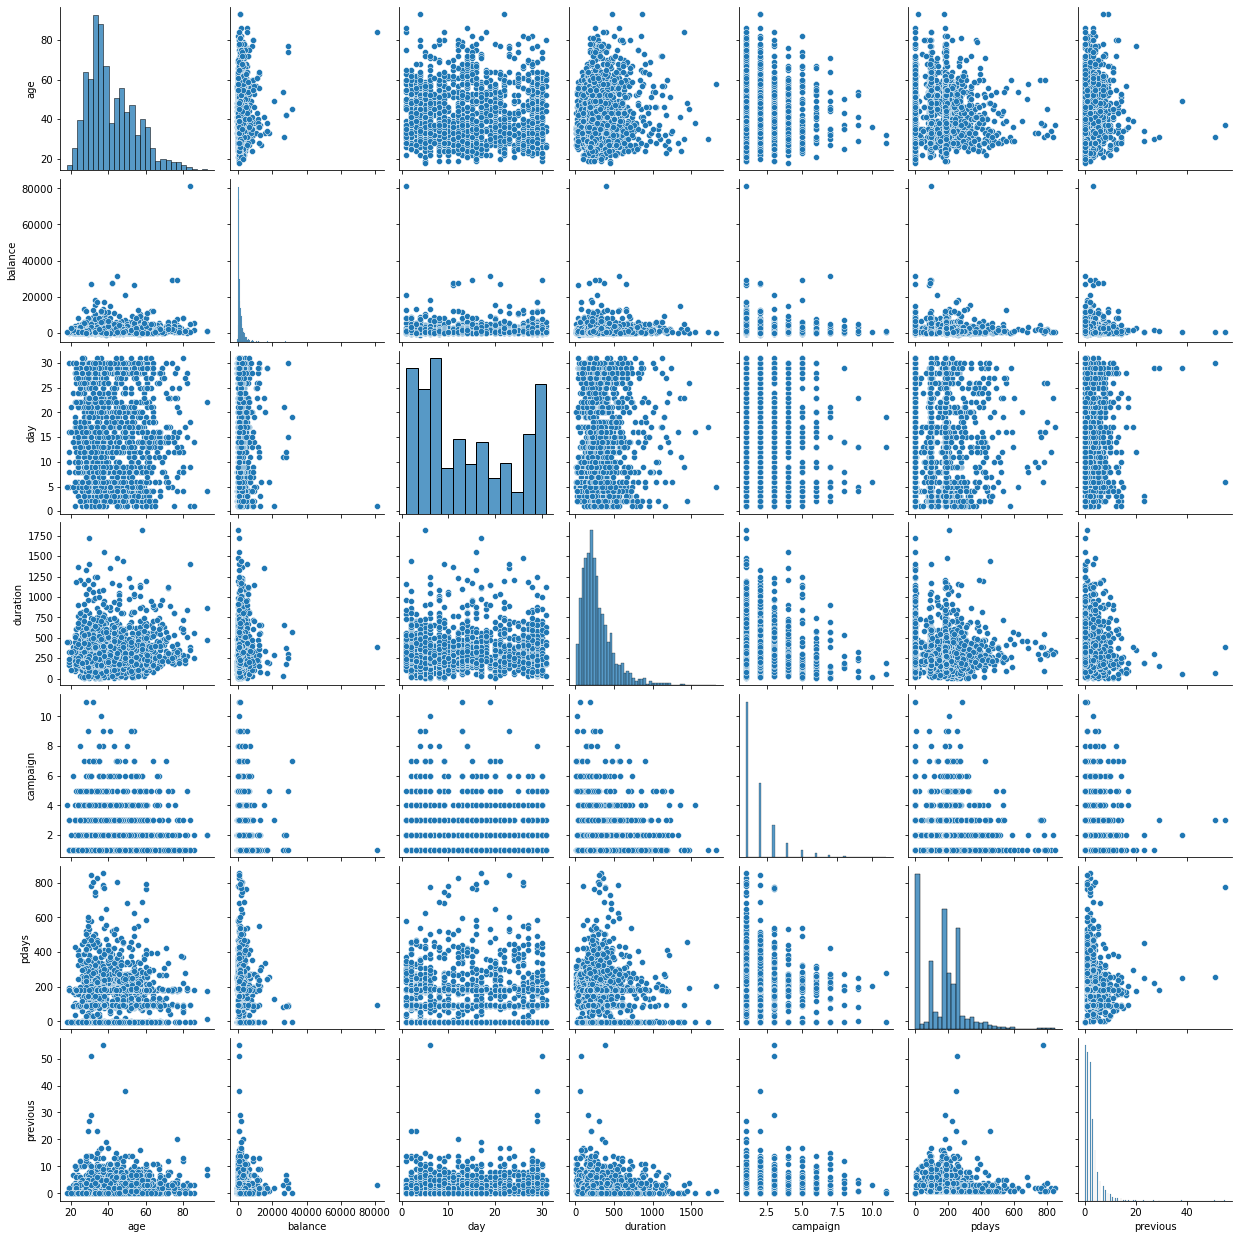

In [56]:
#pairwise plot
sns.pairplot(data=df[['age','balance','day','duration','campaign','pdays','previous']].dropna())
plt.show()

To further confirm the correlation matrix we can't observe any relationship in the the pairwise plot.

### Quick Examination of Categorical Data

In [57]:
#Count the subscribers job titles
df.job.value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [58]:
#Get the percentage of the subscribers job titles
df.job.value_counts(normalize=True)

management       0.231658
technician       0.174874
blue-collar      0.149749
admin.           0.124121
services         0.082915
retired          0.081407
student          0.048241
unemployed       0.034673
self-employed    0.032161
entrepreneur     0.022613
housemaid        0.017588
Name: job, dtype: float64

The highest job is management at 461 subscribers (23%), with technican at 348 subscribers (17%) and blue-collar at 298 (14%) The lowest being a housemaid at 35 subscribers ()

In [59]:
#Count the marital status of the subscribers
df.marital.value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [60]:
#Get the percentages of the subscribers marital status
df.marital.value_counts(normalize=True)

married     0.5555
single      0.3370
divorced    0.1075
Name: marital, dtype: float64

More that half of the subscribers were married 1111 (55%) out of 2000, 674 (33%) were single and 215(11%) divorced. 

In [61]:
#Count the education level of the subscribers
df.education.value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [62]:
#Get the percentages of the subscribers education level
df.education.value_counts(normalize=True)

secondary    0.524789
tertiary     0.360759
primary      0.114451
Name: education, dtype: float64

994 (52%) subscribers have been educated to secondary level, whilst 683 (36%) at tertiary and 217 (11%) educated at primary level. 

In [63]:
#Count the number of subscribers who provided contact information 
df.contact.value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [64]:
#Get the percentages of subscribers who provided contact information 
df.contact.value_counts(normalize=True)

cellular     0.919292
telephone    0.080708
Name: contact, dtype: float64

1663 (92%) provided their cellular number whilst 146(8%) provided a telephone number, I'm not sure if this means they provided a fixed line number, possibly the older generation opted for a fixed line number who may not have been using a cellular phone. 

In [65]:
#Count the subscribers outcomes of the previous markerting campaign. 
df.poutcome.value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [66]:
#Get the percentages of the subscribers outcome 
df.poutcome.value_counts(normalize=True)

failure    0.617723
success    0.287193
other      0.095084
Name: poutcome, dtype: float64

955(62%) had a previous failure in the last marketing campaign, 444(29%) had a success rate and 147(9%) other. 

### Distribution Analysis for Numerical Attributes

<AxesSubplot:>

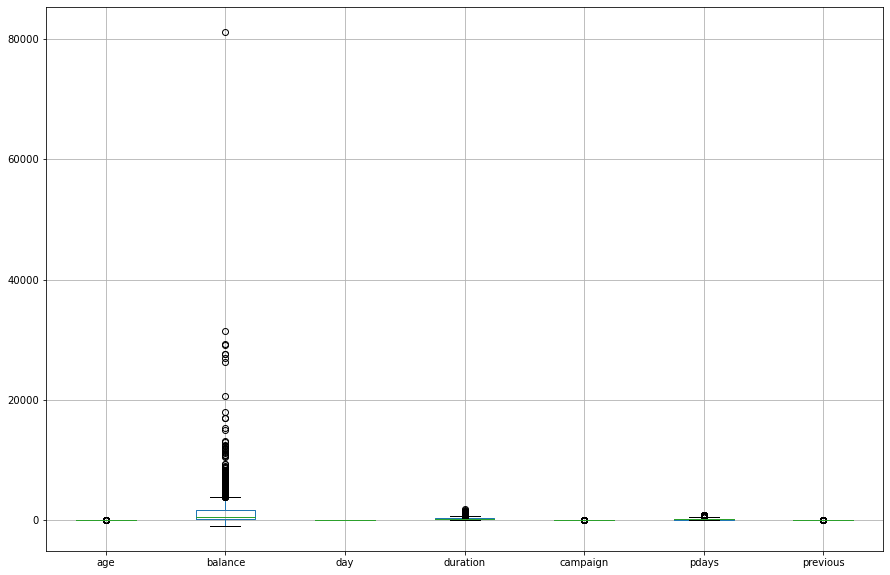

In [77]:
#Using boxplots to look into the numberical attributes further
plt.rcParams["figure.figsize"] = (15,10)
plt.figure(figsize=(15,10))
df.boxplot()

The scale is being impacted by the outlier in the balance data.

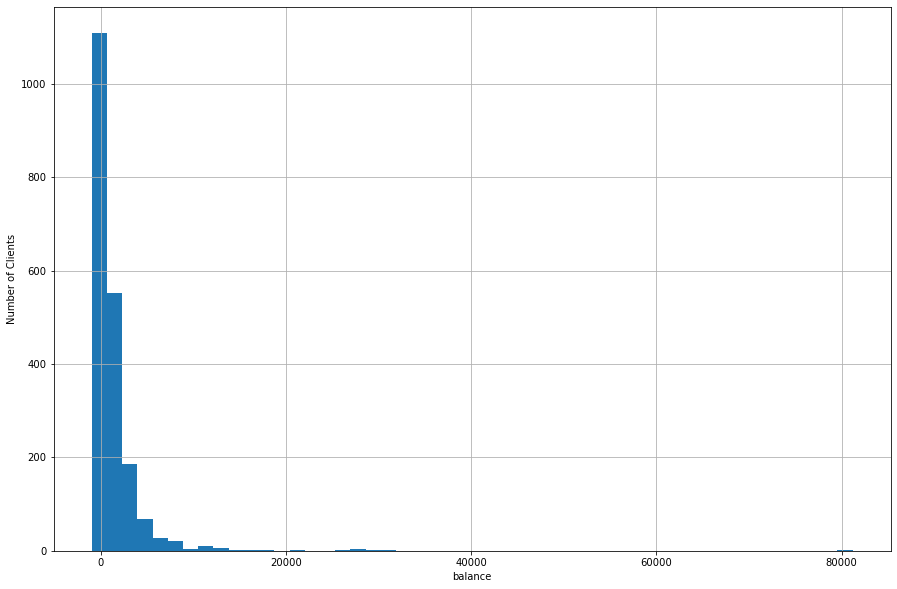

In [84]:
# Next, we examine a histogram of the numerical attribute Balance
df['balance'].hist(bins=50)
plt.xlabel("balance")
plt.ylabel('Number of Clients')
plt.show()

We can see in the histogram above that there is an extremely high number for balance - 80k - as well as a few other outliers above 20k. The usage of 50 bins allows for a clear depiction of the distribution.

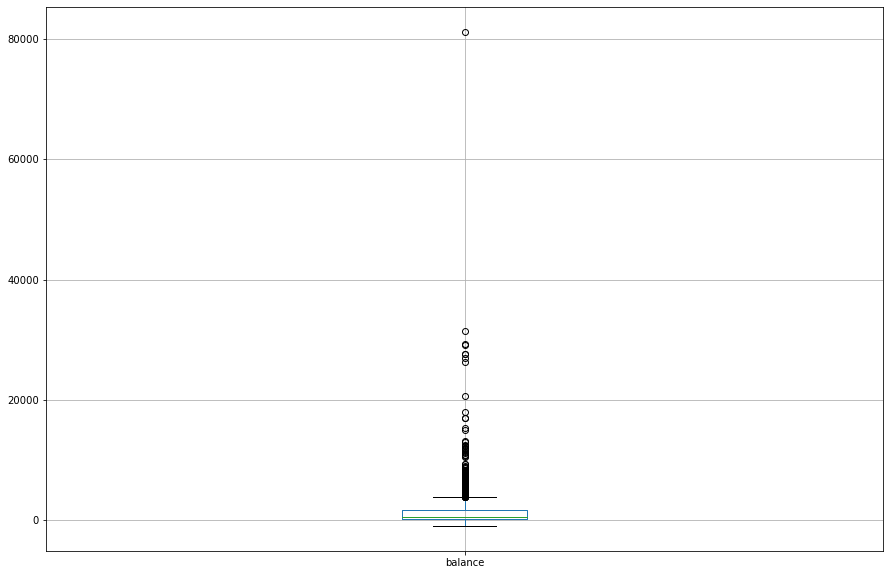

In [78]:
#Boxplot of Balance
df.boxplot(column='balance')
plt.show()

The presence of several outliers/extreme values is observed in the box plot. It's possible that some of this is related to the fact that we're looking at folks with varying degrees of education.

### Exploratory data analystics question: Does education have a contributing factor to the clients balance?  

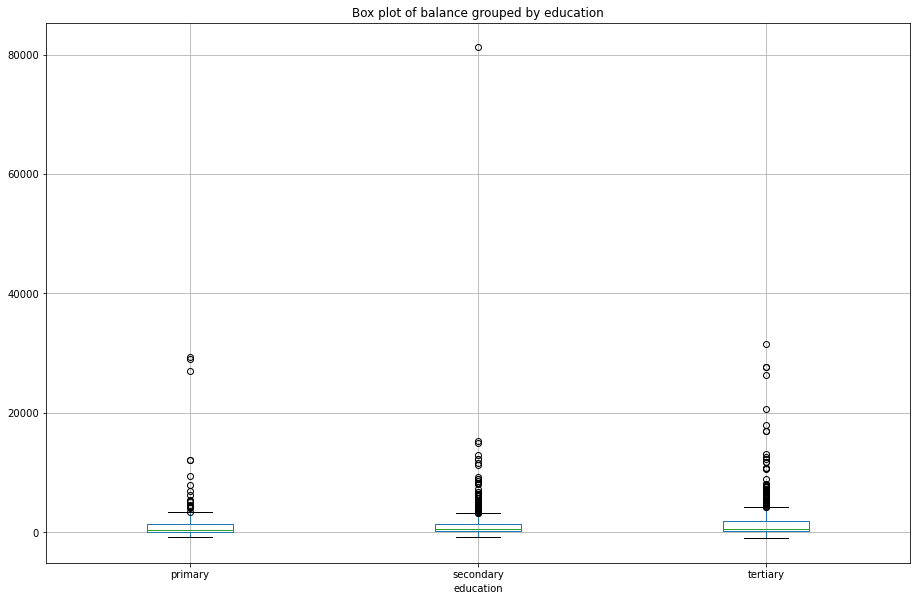

In [86]:
#Boxplots of balance, grouped by the categorical attribute Education
df.boxplot(column='balance', by='education')
plt.title('Box plot of balance grouped by education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

At roughly 80k, the outlier stands out. To have a better look at the mean, minimums, and maximums, let's look at the lower part

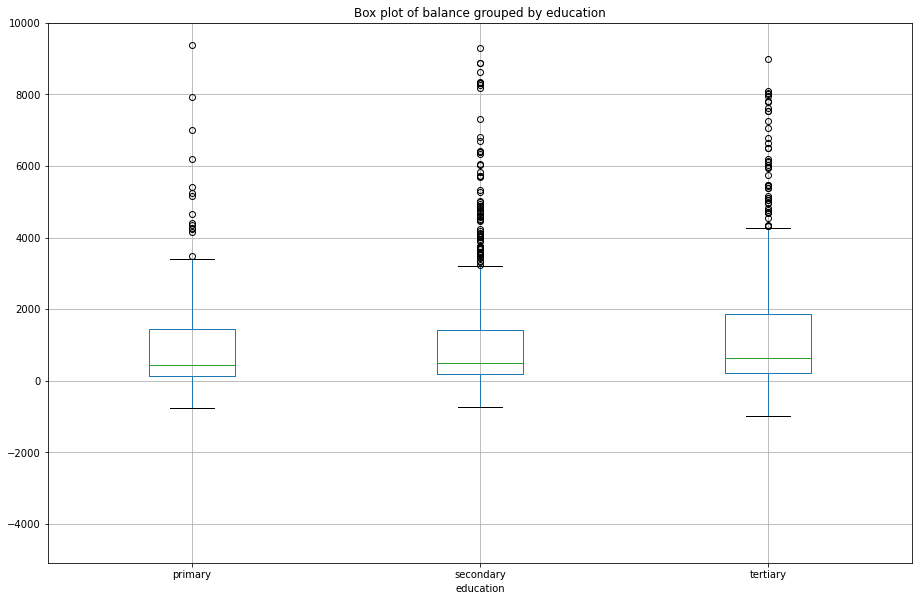

In [83]:
#Boxplots of balance, grouped by the categorical attribute education
df.boxplot(column='balance', by='education')
plt.title('Box plot of balance grouped by education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.ylim(top=10000)
plt.show()

The maximum, minimum, and means are all quite close, the 3 attributes all have outliers and have some balances that are less than 0.